# A1Q2
# Lim, Dongjoon 260587899

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator


# Get data from csv file
train_set1 = pd.read_csv('Dataset_1_train.csv',delimiter =',', header=None)
val_set1 = pd.read_csv('Dataset_1_valid.csv', delimiter =',', header=None)
test_set1 = pd.read_csv('Dataset_1_test.csv',delimiter =',', header=None)


# Saving x and y as vectors 

x_train = train_set1[0]
x_val = val_set1[0]
x_test = test_set1[0]
y_train = train_set1[1]
y_val = val_set1[1]
y_test = test_set1[1]
#print(train_set1,val_set1, test_set1)

# Define function for mse
def mse(y,y_hat):
    return sum([(y_hat[i] - y[i]) ** 2 for i in range(len(y))])/len(y)

def getWeight(x_vector, y_vector):
    # This will make design vector used in closed form.
    x = np.array([[x_vector[i]**j for j in range(21)] for i in range(len(x_vector))])
    # Apply closed form formula to get parameter w
    w = np.linalg.inv((x.T).dot(x)).dot(x.T).dot(y_vector)
    #print (x)
    return w

def y_hat(x, weight):
    return np.array([sum([weight[j] * x[i] ** j for j in range(len(weight))]) for i in range(len(x))]).T


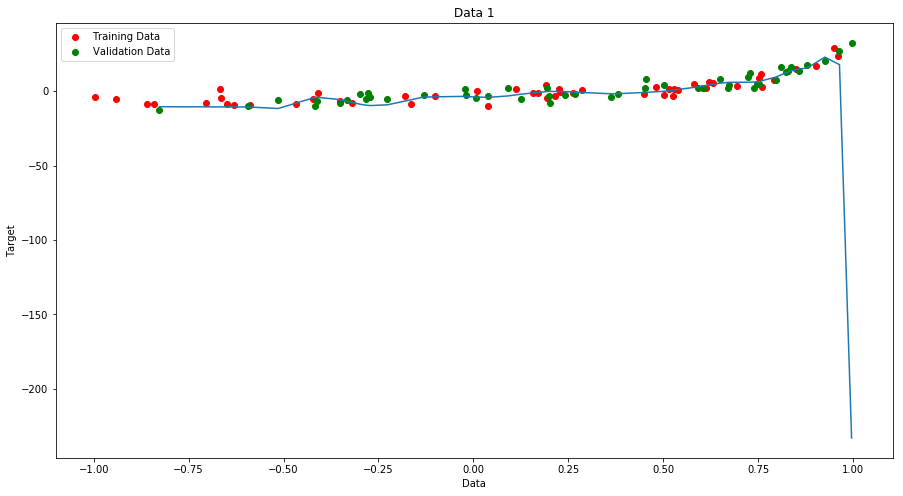

In [2]:
#Plotting Training and Validation data to check if reading csv was done.
np.sort(x_val)
fig = plt.figure(figsize=(15,8))
p = fig.add_subplot(111)
p.set_title('Data 1')
p.scatter(x=x_train,y=y_train,label='Training Data', color = 'red')
p.scatter(x=x_val,y=y_val,label='Validation Data',color='green')
p.plot(np.sort(x_val), y_hat(np.sort(x_val), getWeight(x_train, y_train)))
p.set_xlabel('Data')
p.set_ylabel('Target')
p.legend(loc='upper left');

#plt.show()



### Now lets validate this approximation with validation set


In [3]:
print ("MSE for y_train is : "+str((mse(y_train, y_hat(x_train, getWeight(x_train, y_train))))))
print ("MSE for y_val is : " + str((mse(y_val, y_hat(x_val, getWeight(x_train, y_train))))))

MSE for y_train is : 6.474771052912579
MSE for y_val is : 1422.3007883194443


### Now we will do L2 regularization

In [4]:
def L2Regularization(x, y):
    #Tikhonov regularization
    lambdaList = []
    weight = []
    
    x = np.array([[x[i]**j for j in range(21)] for i in range(len(x))])
    lam = 0.001
    while lam <= 1:
        w = np.linalg.inv(x.T.dot(x) + lam*np.identity(21)).dot(x.T).dot(y)
        weight.append(w)
        lambdaList.append(lam)
        lam += 0.001
    return lambdaList, weight

def l2mse(x,y, weights):
    output = []
    for i in weights:
        output.append(mse(y,y_hat(x,i)))
    return output

### Lets plot L2 regularized

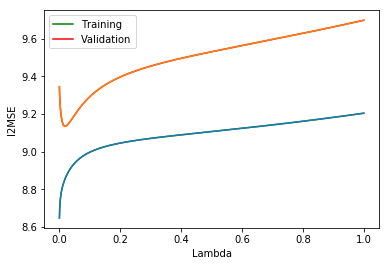

The lambda value that minimizez mse is :0.02000000000000001


In [5]:
lam, weights = L2Regularization(x_train, y_train)
weights = np.array(weights)
train = l2mse(x_train, y_train, weights)
valid = l2mse(x_val, y_val, weights)
lam = np.array(lam)

plt.figure(1)
plt.xlabel('Lambda')
plt.ylabel('l2MSE')


plt.plot(lam, train , 'g', label = 'Training')
plt.plot(lam, valid, 'r', label = "Validation")
plt.plot(lam, train)
plt.plot(lam, valid)
plt.legend(loc = 'best')
plt.show()
print("The lambda value that minimizez mse is :" +str(lam[valid.index(min(valid))]))

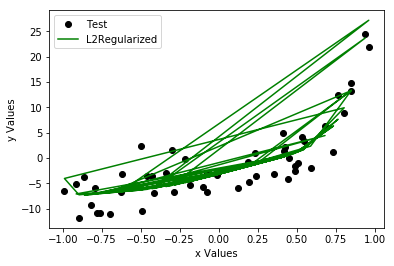

In [6]:
np.sort(x_test) 
np.sort(y_test)
plt.figure(2)
plt.xlabel('x Values')
plt.ylabel('y Values')

plt.plot(x_test, y_test, 'ko', label = 'Test')
plt.plot(x_test, y_hat(x_test, weights[valid.index(min(valid))]), 'g', label = 'L2Regularized')
plt.legend(loc = 'best')
plt.show()